### Задача: предсказать успеваемость студента по его данным (см. колонки G1, G2, G3).  Прототипирование можно делать в jupyter, итоговый результат надо оформить в виде питоновского модуля

Набор данных: https://archive.ics.uci.edu/ml/datasets/student+performance


In [1]:
import pandas as pd
import numpy as np

#### Читаем файлы

```
# %load stud_data/student.txt

# Attributes for both student-mat.csv (Math course) and student-por.csv (Portuguese language course) datasets:
1 school - student's school (binary: "GP" - Gabriel Pereira or "MS" - Mousinho da Silveira)
2 sex - student's sex (binary: "F" - female or "M" - male)
3 age - student's age (numeric: from 15 to 22)
4 address - student's home address type (binary: "U" - urban or "R" - rural)
5 famsize - family size (binary: "LE3" - less or equal to 3 or "GT3" - greater than 3)
6 Pstatus - parent's cohabitation status (binary: "T" - living together or "A" - apart)
7 Medu - mother's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
8 Fedu - father's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
9 Mjob - mother's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")
10 Fjob - father's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")
11 reason - reason to choose this school (nominal: close to "home", school "reputation", "course" preference or "other")
12 guardian - student's guardian (nominal: "mother", "father" or "other")
13 traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
14 studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
15 failures - number of past class failures (numeric: n if 1<=n<3, else 4)
16 schoolsup - extra educational support (binary: yes or no)
17 famsup - family educational support (binary: yes or no)
18 paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
19 activities - extra-curricular activities (binary: yes or no)
20 nursery - attended nursery school (binary: yes or no)
21 higher - wants to take higher education (binary: yes or no)
22 internet - Internet access at home (binary: yes or no)
23 romantic - with a romantic relationship (binary: yes or no)
24 famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
25 freetime - free time after school (numeric: from 1 - very low to 5 - very high)
26 goout - going out with friends (numeric: from 1 - very low to 5 - very high)
27 Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
28 Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
29 health - current health status (numeric: from 1 - very bad to 5 - very good)
30 absences - number of school absences (numeric: from 0 to 93)

# these grades are related with the course subject, Math or Portuguese:
31 G1 - first period grade (numeric: from 0 to 20)
31 G2 - second period grade (numeric: from 0 to 20)
32 G3 - final grade (numeric: from 0 to 20, output target)

Additional note: there are several (382) students that belong to both datasets . 
These students can be identified by searching for identical attributes
that characterize each student, as shown in the annexed R file.
```

In [2]:
df1 = pd.read_csv('stud_data/student-mat.csv', sep=';')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
school        395 non-null object
sex           395 non-null object
age           395 non-null int64
address       395 non-null object
famsize       395 non-null object
Pstatus       395 non-null object
Medu          395 non-null int64
Fedu          395 non-null int64
Mjob          395 non-null object
Fjob          395 non-null object
reason        395 non-null object
guardian      395 non-null object
traveltime    395 non-null int64
studytime     395 non-null int64
failures      395 non-null int64
schoolsup     395 non-null object
famsup        395 non-null object
paid          395 non-null object
activities    395 non-null object
nursery       395 non-null object
higher        395 non-null object
internet      395 non-null object
romantic      395 non-null object
famrel        395 non-null int64
freetime      395 non-null int64
goout         395 non-null int64
Dalc          395 no

In [3]:
df2 = pd.read_csv('stud_data/student-por.csv', sep = ';')
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
school        649 non-null object
sex           649 non-null object
age           649 non-null int64
address       649 non-null object
famsize       649 non-null object
Pstatus       649 non-null object
Medu          649 non-null int64
Fedu          649 non-null int64
Mjob          649 non-null object
Fjob          649 non-null object
reason        649 non-null object
guardian      649 non-null object
traveltime    649 non-null int64
studytime     649 non-null int64
failures      649 non-null int64
schoolsup     649 non-null object
famsup        649 non-null object
paid          649 non-null object
activities    649 non-null object
nursery       649 non-null object
higher        649 non-null object
internet      649 non-null object
romantic      649 non-null object
famrel        649 non-null int64
freetime      649 non-null int64
goout         649 non-null int64
Dalc          649 no

In [4]:
# df3 = pd.DataFrame({'1': df1.columns, '2':df2.columns})
# df3.T

#### Объединяем записи студентов в один список.

In [5]:
df = pd.concat([df2, df1], ignore_index=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 33 columns):
school        1044 non-null object
sex           1044 non-null object
age           1044 non-null int64
address       1044 non-null object
famsize       1044 non-null object
Pstatus       1044 non-null object
Medu          1044 non-null int64
Fedu          1044 non-null int64
Mjob          1044 non-null object
Fjob          1044 non-null object
reason        1044 non-null object
guardian      1044 non-null object
traveltime    1044 non-null int64
studytime     1044 non-null int64
failures      1044 non-null int64
schoolsup     1044 non-null object
famsup        1044 non-null object
paid          1044 non-null object
activities    1044 non-null object
nursery       1044 non-null object
higher        1044 non-null object
internet      1044 non-null object
romantic      1044 non-null object
famrel        1044 non-null int64
freetime      1044 non-null int64
goout         1044 non-nul

#### Категоризируем строковые значения

In [7]:
cat_columns = df.select_dtypes(include=['object']).columns 
cat_columns

Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'],
      dtype='object')

In [8]:
for c in cat_columns: # конвертируем все колонки-обьекты в категории
    df[c] = df[c].astype('category')

In [9]:
# сохраним категории
categories = {}
for c in cat_columns:
    categories[c] = [v for v in df[c].cat.categories]

categories

{'Fjob': ['at_home', 'health', 'other', 'services', 'teacher'],
 'Mjob': ['at_home', 'health', 'other', 'services', 'teacher'],
 'Pstatus': ['A', 'T'],
 'activities': ['no', 'yes'],
 'address': ['R', 'U'],
 'famsize': ['GT3', 'LE3'],
 'famsup': ['no', 'yes'],
 'guardian': ['father', 'mother', 'other'],
 'higher': ['no', 'yes'],
 'internet': ['no', 'yes'],
 'nursery': ['no', 'yes'],
 'paid': ['no', 'yes'],
 'reason': ['course', 'home', 'other', 'reputation'],
 'romantic': ['no', 'yes'],
 'school': ['GP', 'MS'],
 'schoolsup': ['no', 'yes'],
 'sex': ['F', 'M']}

In [10]:
df[cat_columns] = df[cat_columns].apply(lambda x: x.cat.codes) # заменим на категории

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 33 columns):
school        1044 non-null int8
sex           1044 non-null int8
age           1044 non-null int64
address       1044 non-null int8
famsize       1044 non-null int8
Pstatus       1044 non-null int8
Medu          1044 non-null int64
Fedu          1044 non-null int64
Mjob          1044 non-null int8
Fjob          1044 non-null int8
reason        1044 non-null int8
guardian      1044 non-null int8
traveltime    1044 non-null int64
studytime     1044 non-null int64
failures      1044 non-null int64
schoolsup     1044 non-null int8
famsup        1044 non-null int8
paid          1044 non-null int8
activities    1044 non-null int8
nursery       1044 non-null int8
higher        1044 non-null int8
internet      1044 non-null int8
romantic      1044 non-null int8
famrel        1044 non-null int64
freetime      1044 non-null int64
goout         1044 non-null int64
Dalc          1044 non-nul

In [12]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,0,18,1,0,0,4,4,0,4,...,4,3,4,1,1,3,4,0,11,11
1,0,0,17,1,0,1,1,1,0,2,...,5,3,3,1,1,3,2,9,11,11
2,0,0,15,1,1,1,1,1,0,2,...,4,3,2,2,3,3,6,12,13,12
3,0,0,15,1,0,1,4,2,1,3,...,3,2,2,1,1,5,0,14,14,14
4,0,0,16,1,0,1,3,3,2,2,...,4,3,2,1,2,5,0,11,13,13


#### Отобразим корреляцию между переменными

In [13]:
corr_data = df.corr()

In [14]:
corr_data.shape

(33, 33)

In [15]:
import matplotlib.pyplot as plt

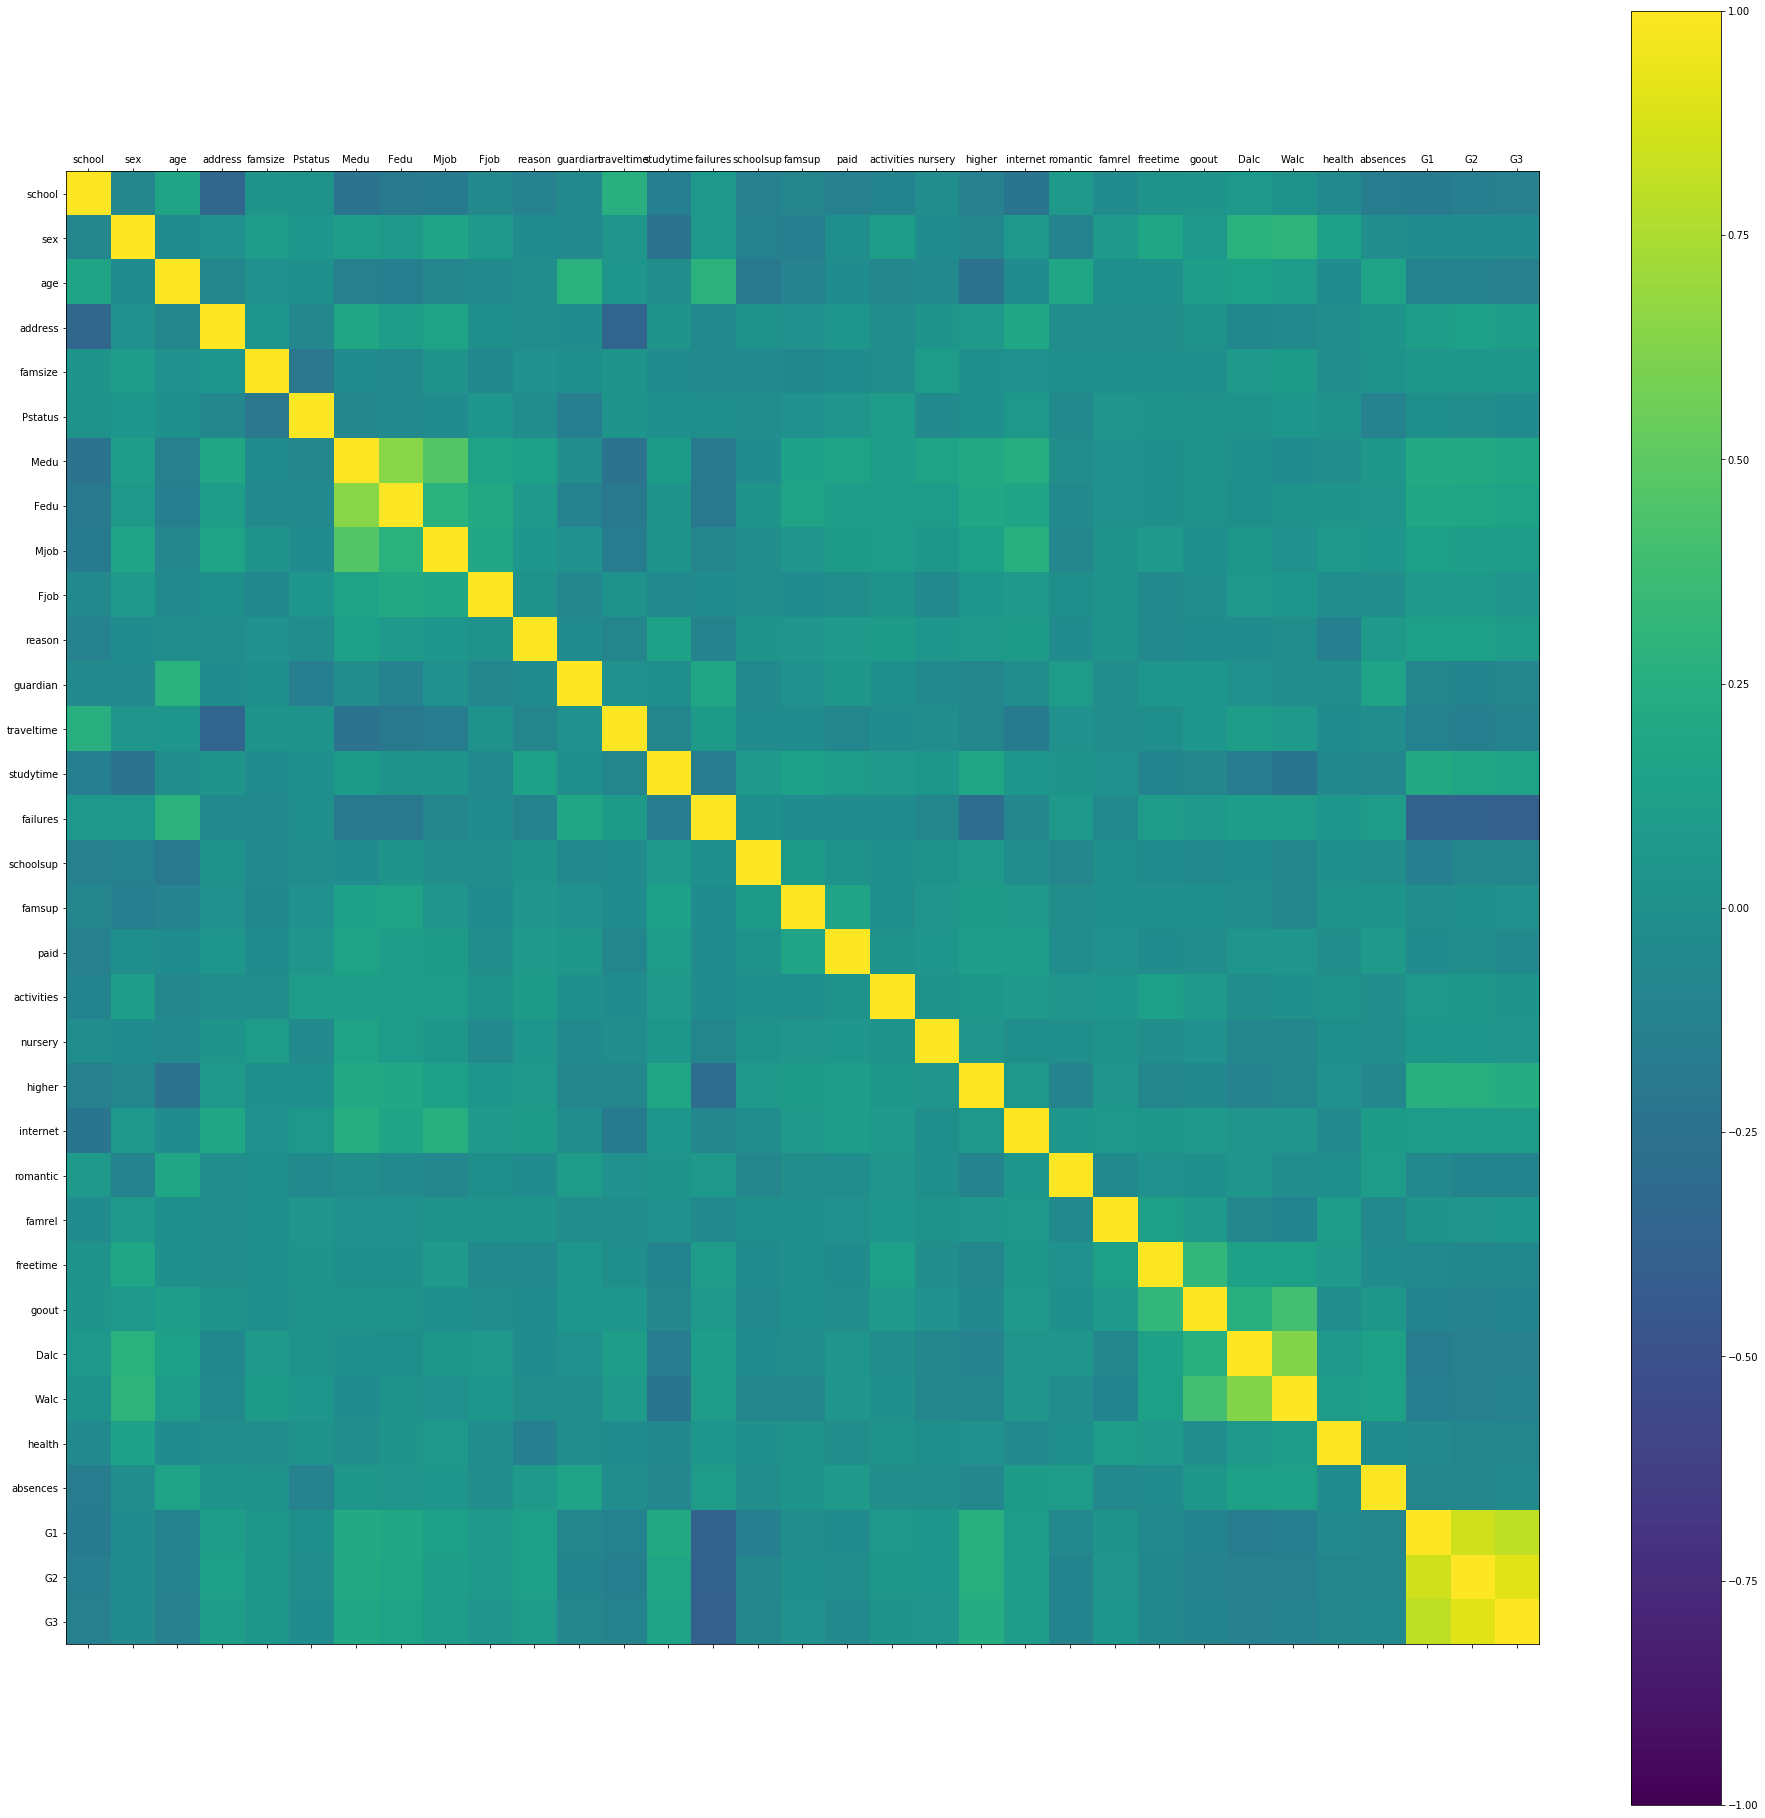

In [16]:
fig = plt.figure(figsize=(33, 33))
ax = fig.add_subplot(111)
cax = ax.matshow(corr_data, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0, 33, 1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(df.columns)
ax.set_yticklabels(df.columns)
plt.show()

#### Подготовка данных для модели

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
labels = df[['G1', 'G2', 'G3']]
df_G1 = df.drop(['G1', 'G2', 'G3'], axis=1)
df_G2 = df.drop(['G2', 'G3'], axis=1)
df_G3 = df.drop(['G1', 'G3'], axis=1) # оставляем только G2, т.к. G1 и G2 сильно коррелируют

In [19]:
X_train_G1, X_test_G1, y_train_G1, y_test_G1 = train_test_split(
    df_G1, 
    labels.G1, 
    test_size=0.33, 
    random_state=42
)


X_train_G2, X_test_G2, y_train_G2, y_test_G2 = train_test_split(
    df_G2, 
    labels.G2, 
    test_size=0.33, 
    random_state=42
)


X_train_G3, X_test_G3, y_train_G3, y_test_G3 = train_test_split(
    df_G3, 
    labels.G3, 
    test_size=0.33, 
    random_state=42
)

### Обучение модели и предсказание оценок (G1, G2, G3)
#### LinearRegression

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
lr1 = LinearRegression()
lr2 = LinearRegression()
lr3 = LinearRegression()

In [22]:
lr1.fit(X_train_G1, y_train_G1)
pred_G1 = lr1.predict(X_test_G1)

lr2.fit(X_train_G2, y_train_G2)
pred_G2 = lr2.predict(X_test_G2)

lr3.fit(X_train_G3, y_train_G3)
pred_G3 = lr3.predict(X_test_G3)

#### xgboost

In [23]:
import xgboost as xgb

/home/ska/virtenv/bigd/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [24]:
boost_model_G1 = xgb.XGBRegressor(max_depth=3, learning_rate=0.1, n_estimators=100).fit(X_train_G1, y_train_G1)
boost_model_G2 = xgb.XGBRegressor(max_depth=3, learning_rate=0.1, n_estimators=100).fit(X_train_G2, y_train_G2)
boost_model_G3 = xgb.XGBRegressor(max_depth=3, learning_rate=0.1, n_estimators=100).fit(X_train_G3, y_train_G3)

In [25]:
boost_pred_G1 = boost_model_G1.predict(X_test_G1)
boost_pred_G2 = boost_model_G2.predict(X_test_G2)
boost_pred_G3 = boost_model_G3.predict(X_test_G3)

#### RMSE

In [26]:
from sklearn import metrics

In [27]:
print(
    'RMSE error of LR prediction {}: {}'.format('G1', np.sqrt(metrics.mean_squared_error(y_test_G1, pred_G1))),
    'RMSE error of LR prediction {}: {}'.format('G2', np.sqrt(metrics.mean_squared_error(y_test_G2, pred_G2))),
    'RMSE error of LR prediction {}: {}'.format('G3', np.sqrt(metrics.mean_squared_error(y_test_G3, pred_G3))),
    sep='\n'
)

print(
    'RMSE error of XGBoost prediction {}: {}'.format('G1', np.sqrt(metrics.mean_squared_error(y_test_G1, boost_pred_G1))),
    'RMSE error of XGBoost prediction {}: {}'.format('G2', np.sqrt(metrics.mean_squared_error(y_test_G2, boost_pred_G2))),
    'RMSE error of XGBoost prediction {}: {}'.format('G3', np.sqrt(metrics.mean_squared_error(y_test_G3, boost_pred_G3))),
    sep='\n'
)

RMSE error of LR prediction G1: 2.6682877175369604
RMSE error of LR prediction G2: 1.6667394740519963
RMSE error of LR prediction G3: 1.5158965979989762
RMSE error of XGBoost prediction G1: 2.5718194261687284
RMSE error of XGBoost prediction G2: 1.6259728894355534
RMSE error of XGBoost prediction G3: 1.4002368515337806
